# ================ SLEEP STAGE =================

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sleep_stage.csv', sep=',', skiprows=1, index_col=False)

print(df.head(3))

   create_sh_ver               start_time  \
0            NaN  2023-04-16 19:58:00.000   
1            NaN  2023-04-16 20:20:00.000   
2            NaN  2023-04-16 20:33:00.000   

                               sleep_id  custom  modify_sh_ver  \
0  8d6d9ced-7394-4ead-8c70-21fa4649ed70     NaN            NaN   
1  8d6d9ced-7394-4ead-8c70-21fa4649ed70     NaN            NaN   
2  8d6d9ced-7394-4ead-8c70-21fa4649ed70     NaN            NaN   

               update_time              create_time  stage time_offset  \
0  2023-04-17 00:31:59.090  2023-04-17 00:31:59.090  40002    UTC+0400   
1  2023-04-17 00:31:59.090  2023-04-17 00:31:59.090  40003    UTC+0400   
2  2023-04-17 00:31:59.090  2023-04-17 00:31:59.090  40001    UTC+0400   

   deviceuuid                     pkg_name                 end_time  \
0  g1H1gSpl4L  com.sec.android.app.shealth  2023-04-16 20:20:00.000   
1  g1H1gSpl4L  com.sec.android.app.shealth  2023-04-16 20:33:00.000   
2  g1H1gSpl4L  com.sec.android.app.shealth  

In [ ]:
# diff utc need to be standaridized

unique_devices = df['time_offset'].nunique()

print(df['time_offset'].unique())


['UTC+0400' 'UTC+0300' 'UTC+0800' 'UTC+0700']


In [ ]:
# remove empty columns
df = df.drop(columns=['create_sh_ver', 'pkg_name','modify_sh_ver','datauuid','create_time','custom'])

print(df.head())

                start_time                              sleep_id  \
0  2023-04-16 19:58:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
1  2023-04-16 20:20:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
2  2023-04-16 20:33:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
3  2023-04-16 20:36:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
4  2023-04-16 20:50:00.000  8d6d9ced-7394-4ead-8c70-21fa4649ed70   

               update_time  stage time_offset  deviceuuid  \
0  2023-04-17 00:31:59.090  40002    UTC+0400  g1H1gSpl4L   
1  2023-04-17 00:31:59.090  40003    UTC+0400  g1H1gSpl4L   
2  2023-04-17 00:31:59.090  40001    UTC+0400  g1H1gSpl4L   
3  2023-04-17 00:31:59.091  40002    UTC+0400  g1H1gSpl4L   
4  2023-04-17 00:31:59.091  40001    UTC+0400  g1H1gSpl4L   

                  end_time  
0  2023-04-16 20:20:00.000  
1  2023-04-16 20:33:00.000  
2  2023-04-16 20:36:00.000  
3  2023-04-16 20:50:00.000  
4  2023-04-16 20:51:00.000  


In [ ]:
# change time columns to datetime format
datetime_cols = ['start_time', 'update_time','end_time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print(df.dtypes)
print(df.head())

start_time     datetime64[ns]
sleep_id               object
update_time    datetime64[ns]
stage                   int64
time_offset            object
deviceuuid             object
end_time       datetime64[ns]
dtype: object
           start_time                              sleep_id  \
0 2023-04-16 19:58:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
1 2023-04-16 20:20:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
2 2023-04-16 20:33:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
3 2023-04-16 20:36:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   
4 2023-04-16 20:50:00  8d6d9ced-7394-4ead-8c70-21fa4649ed70   

              update_time  stage time_offset  deviceuuid            end_time  
0 2023-04-17 00:31:59.090  40002    UTC+0400  g1H1gSpl4L 2023-04-16 20:20:00  
1 2023-04-17 00:31:59.090  40003    UTC+0400  g1H1gSpl4L 2023-04-16 20:33:00  
2 2023-04-17 00:31:59.090  40001    UTC+0400  g1H1gSpl4L 2023-04-16 20:36:00  
3 2023-04-17 00:31:59.091  40002    UTC+0400  g1H1gSpl4L 2023-04-16 20:50:00  
4 

convert datetime column according to Malaysia Time (UTC +8)

In [ ]:
from datetime import timedelta

def convert_to_myt(df, time_col, offset_col):
    """Convert datetime ikut time_offset ke Malaysia time (UTC+8)"""
    # Extract offset hours & minutes dari string macam 'UTC+0400'
    df['offset_hours'] = df[offset_col].str[3:6].astype(int)
    df['offset_minutes'] = df[offset_col].str[6:8].astype(int)

    # Kira beza dari offset asal ke UTC+8
    diff_hours = 8 - df['offset_hours']
    diff_minutes = -df['offset_minutes']  # kalau ada minit selain 00

    # Apply perubahan masa
    df[time_col] = df[time_col] + pd.to_timedelta(diff_hours, unit='h') + pd.to_timedelta(diff_minutes, unit='m')

    # Buang column extra
    df.drop(columns=['offset_hours', 'offset_minutes'], inplace=True)
    return df

# Apply untuk start_time & end_time
df = convert_to_myt(df, 'start_time', 'time_offset')
df = convert_to_myt(df, 'end_time', 'time_offset')

print(df[['start_time', 'end_time', 'time_offset']].head())

           start_time            end_time time_offset
0 2023-04-16 23:58:00 2023-04-17 00:20:00    UTC+0400
1 2023-04-17 00:20:00 2023-04-17 00:33:00    UTC+0400
2 2023-04-17 00:33:00 2023-04-17 00:36:00    UTC+0400
3 2023-04-17 00:36:00 2023-04-17 00:50:00    UTC+0400
4 2023-04-17 00:50:00 2023-04-17 00:51:00    UTC+0400


In [ ]:
import numpy as np

# Buat date column
df['date'] = df['start_time'].dt.date

# Sleep duration in hours
df['sleep_duration'] = (df['end_time'] - df['start_time']) / np.timedelta64(1, 'h')

# Waking hour
df['waking_hour'] = df['end_time'].dt.hour

# Summary table 1 row per date
daily_sleep = (
    df.groupby('date').agg(
        total_sleep_duration=('sleep_duration', 'sum'),
        latest_waking_hour=('waking_hour', 'max'),
        start_hour=('start_time', lambda x: x.min().time()),
        end_hour=('end_time', lambda x: x.max().time()),
        sleep_gap=('end_time', lambda x: (x.max() - x.min()) / np.timedelta64(1, 'h')),
        Disrupted=('start_time', lambda x: 1 if len(x) > 1 else 0),
        deviceuuid=('deviceuuid', lambda x: x.mode()[0] if not x.mode().empty else None)
    )
).reset_index()

print(daily_sleep.head())

         date  total_sleep_duration  latest_waking_hour start_hour  end_hour  \
0  2023-04-16              0.366667                   0   23:58:00  00:20:00   
1  2023-04-17              6.183333                  13   00:20:00  13:54:00   
2  2023-04-18              6.983333                  13   02:09:00  13:28:00   
3  2023-04-19              7.966667                   8   00:20:00  08:52:00   
4  2023-04-20              7.633333                  15   00:00:00  15:00:00   

   sleep_gap  Disrupted  deviceuuid  
0   0.000000          0  g1H1gSpl4L  
1  13.350000          1  g1H1gSpl4L  
2  10.933333          1  g1H1gSpl4L  
3   8.266667          1  g1H1gSpl4L  
4  14.850000          1  g1H1gSpl4L  


In [ ]:
daily_sleep.tail(20)

,date,total_sleep_duration,latest_waking_hour,start_hour,end_hour,sleep_gap,Disrupted,deviceuuid
208,2025-04-19,2.900000,12,09:42:00,12:36:00,2.616667,1,g1H1gSpl4L
209,2025-04-21,6.450000,22,15:36:00,22:03:00,5.958333,1,g1H1gSpl4L
210,2025-04-24,4.983333,21,17:00:00,21:59:00,4.600000,1,g1H1gSpl4L
211,2025-04-25,8.000000,22,14:10:00,22:10:00,7.583333,1,g1H1gSpl4L
212,2025-05-01,7.016667,21,14:04:00,21:05:00,6.741667,1,g1H1gSpl4L
213,2025-05-02,4.233333,23,19:08:00,23:22:00,3.758333,1,g1H1gSpl4L
214,2025-05-27,5.533333,21,16:21:00,21:53:00,5.241667,1,g1H1gSpl4L
215,2025-05-30,5.008333,22,17:28:00,22:28:30,4.583333,1,g1H1gSpl4L
216,2025-06-09,5.991667,23,16:41:00,00:01:30,7.091667,1,g1H1gSpl4L
217,2025-06-10,0.075000,0,00:01:30,00:06:00,0.066667,1,g1H1gSpl4L


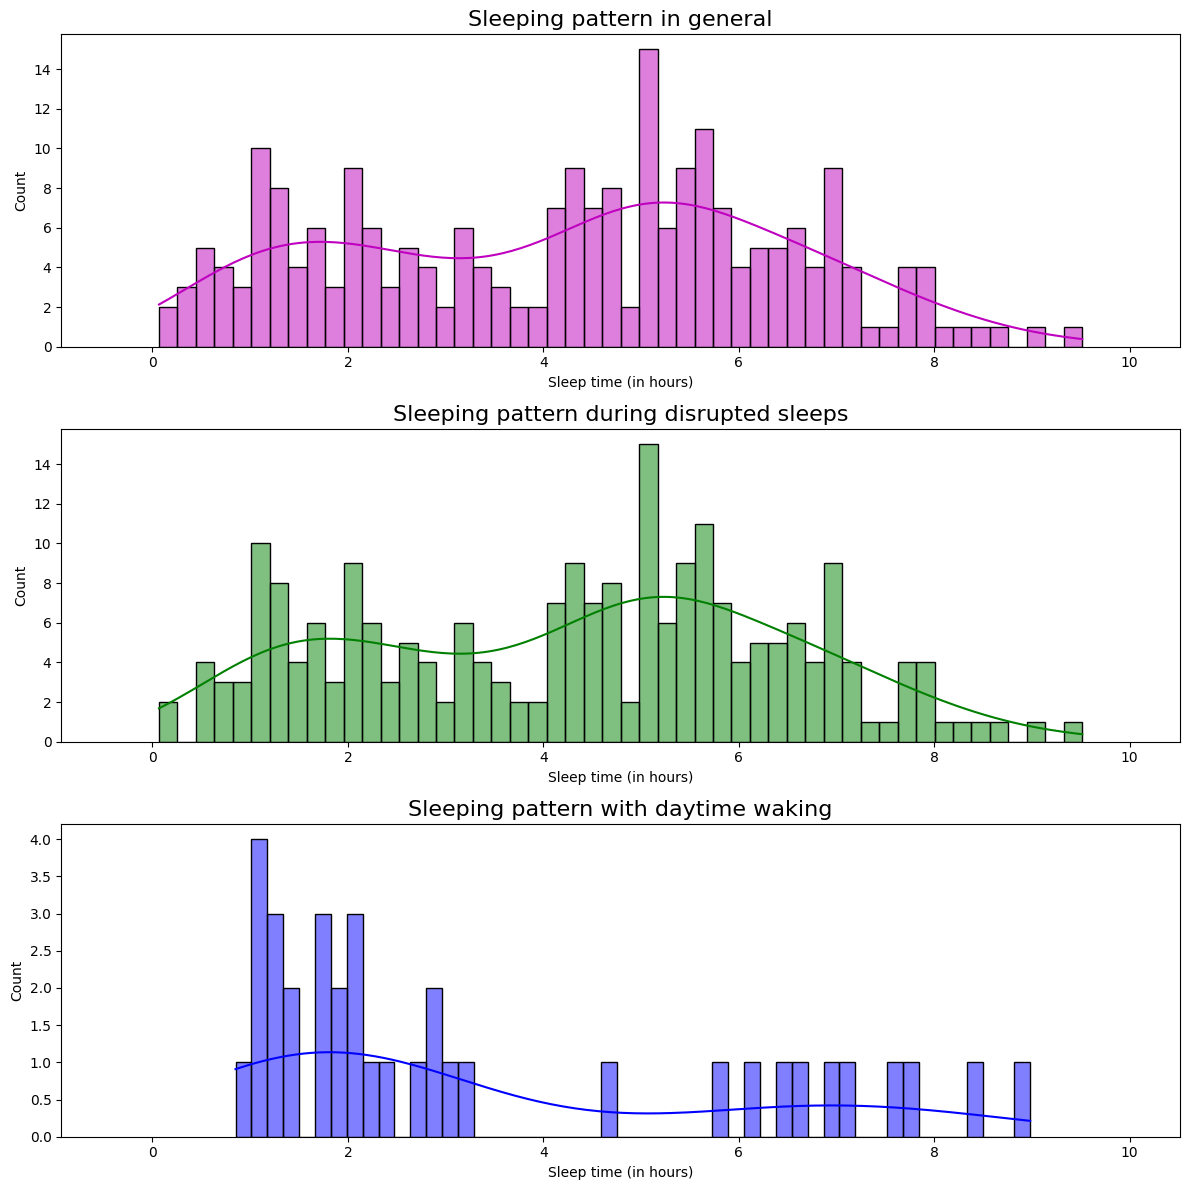

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# 1. Distribution of all sleep durations
ax1 = plt.subplot(311)
sns.histplot(daily_sleep['total_sleep_duration'], color="m", bins=50, kde=True, ax=ax1)
ax1.set_xlim(daily_sleep['total_sleep_duration'].min()-1,
             daily_sleep['total_sleep_duration'].max()+1)
ax1.set_xlabel('Sleep time (in hours)')
ax1.set_title('Sleeping pattern in general', size=16)

# 2. Disrupted sleep
ax2 = plt.subplot(312)
sns.histplot(daily_sleep[daily_sleep.Disrupted == 1]['total_sleep_duration'],
             color="g", bins=50, kde=True, ax=ax2)
ax2.set_xlim(daily_sleep['total_sleep_duration'].min()-1,
             daily_sleep['total_sleep_duration'].max()+1)
ax2.set_xlabel('Sleep time (in hours)')
ax2.set_title('Sleeping pattern during disrupted sleeps', size=16)

# 3. Daytime waking hours (10am – 7pm)
ax3 = plt.subplot(313)
sns.histplot(daily_sleep[(daily_sleep.latest_waking_hour >= 10) &
                         (daily_sleep.latest_waking_hour <= 19)]['total_sleep_duration'],
             color="b", bins=50, kde=True, ax=ax3)
ax3.set_xlim(daily_sleep['total_sleep_duration'].min()-1,
             daily_sleep['total_sleep_duration'].max()+1)
ax3.set_xlabel('Sleep time (in hours)')
ax3.set_title('Sleeping pattern with daytime waking', size=16)

plt.tight_layout()
plt.show()


**Sleep Analysis**   
From the distribution plots about the sleep pattern we see that the user has bimodal distribution:     


- On average, the user spends around 8 hours sleeping, although there are days when the duration drops to about 4 hours.
- We also looked into whether this irregular pattern could be due to waking up in the middle of the night and having that counted as sleep. However, even on nights without interruptions, the same behaviour can still be seen.
- We further checked if the sleeping habit changes during the daytime (between 10 am to 7 pm), but the pattern remains consistent.  


Overall, the data shows two main patterns of sleep duration. Some nights are very short, while others are much longer. The numbers might not be exact because of tracking issues, but the trend of having both short and long sleep looks quite consistent.

# ======== TRACKER HEART RATE =========

In [ ]:
import pandas as pd

df = pd.read_csv('/content/tracker.heart_rate.csv',sep=',', skiprows=1, index_col=False)

# Rename column to simpler name
df.rename(columns={
    'source': 'source',
    'tag_id': 'tag_id',
    'com.samsung.health.heart_rate.create_sh_ver': 'create_sh_ver',
    'com.samsung.health.heart_rate.heart_beat_count': 'heart_beat_count',
    'com.samsung.health.heart_rate.start_time': 'start_time',
    'com.samsung.health.heart_rate.custom': 'custom',
    'com.samsung.health.heart_rate.binning_data': 'binning_data',
    'com.samsung.health.heart_rate.modify_sh_ver': 'modify_sh_ver',
    'com.samsung.health.heart_rate.update_time': 'update_time',
    'com.samsung.health.heart_rate.create_time': 'create_time',
    'com.samsung.health.heart_rate.client_data_id': 'client_data_id',
    'com.samsung.health.heart_rate.max': 'max',
    'com.samsung.health.heart_rate.min': 'min',
    'com.samsung.health.heart_rate.client_data_ver': 'client_data_ver',
    'com.samsung.health.heart_rate.time_offset': 'time_offset',
    'com.samsung.health.heart_rate.deviceuuid': 'deviceuuid',
    'com.samsung.health.heart_rate.comment': 'comment',
    'com.samsung.health.heart_rate.pkg_name': 'pkg_name',
    'com.samsung.health.heart_rate.end_time': 'end_time',
    'com.samsung.health.heart_rate.datauuid': 'datauuid',
    'com.samsung.health.heart_rate.heart_rate': 'heart_rate'
}, inplace=True)

print(df.head(4))

   source  tag_id  create_sh_ver  heart_beat_count               start_time  \
0     NaN   20000            NaN                 0  2021-03-28 17:55:39.422   
1     NaN   21310            NaN                 0  2020-02-13 23:48:52.238   
2     NaN   21000            NaN                 0  2019-05-12 08:25:50.550   
3     NaN   20000            NaN                 0  2020-08-04 01:38:00.855   

   custom binning_data  modify_sh_ver              update_time  \
0     NaN          NaN            NaN  2021-03-28 17:55:45.003   
1     NaN          NaN            NaN  2020-02-13 23:49:00.610   
2     NaN          NaN            NaN  2019-05-12 08:26:13.027   
3     NaN          NaN            NaN  2020-08-04 01:38:42.057   

               create_time  ...    max    min  client_data_ver  time_offset  \
0  2021-03-28 17:55:45.003  ...   78.0   78.0              NaN     UTC+0100   
1  2020-02-13 23:49:00.610  ...  165.0  165.0              NaN     UTC+0700   
2  2019-05-12 08:26:13.027  ...  103

In [ ]:
# check for deviceuuid unique name
unique_devices = df['deviceuuid'].nunique()
print(df['deviceuuid'].unique())

['SKF4LSPdEJ' 'lvlxdGoupB' 'WJC3AJvTjh' 'd7hSj8xDp1']


In [ ]:
# 1.remove empty columns
df = df.drop(columns=['client_data_id','source','create_sh_ver','custom','binning_data','modify_sh_ver','comment','pkg_name','client_data_ver'])

In [ ]:
# Convert all column o datetiime format before sorting
datetime_cols = ['update_time', 'start_time', 'create_time','end_time']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# arrange based on update_time
df.sort_values(by='update_time', inplace=True)

# Reset index lepas susun
df.reset_index(drop=True, inplace=True)

df.info()
print(df.head(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16579 entries, 0 to 16578
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tag_id            16579 non-null  int64         
 1   heart_beat_count  16579 non-null  int64         
 2   start_time        16579 non-null  datetime64[ns]
 3   update_time       16579 non-null  datetime64[ns]
 4   create_time       16579 non-null  datetime64[ns]
 5   max               5525 non-null   float64       
 6   min               5525 non-null   float64       
 7   time_offset       16579 non-null  object        
 8   deviceuuid        16579 non-null  object        
 9   end_time          16579 non-null  datetime64[ns]
 10  datauuid          16579 non-null  object        
 11  heart_rate        16579 non-null  float64       
dtypes: datetime64[ns](4), float64(3), int64(2), object(3)
memory usage: 1.5+ MB
   tag_id  heart_beat_count              start_time   

/tmp/ipython-input-3124939538.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


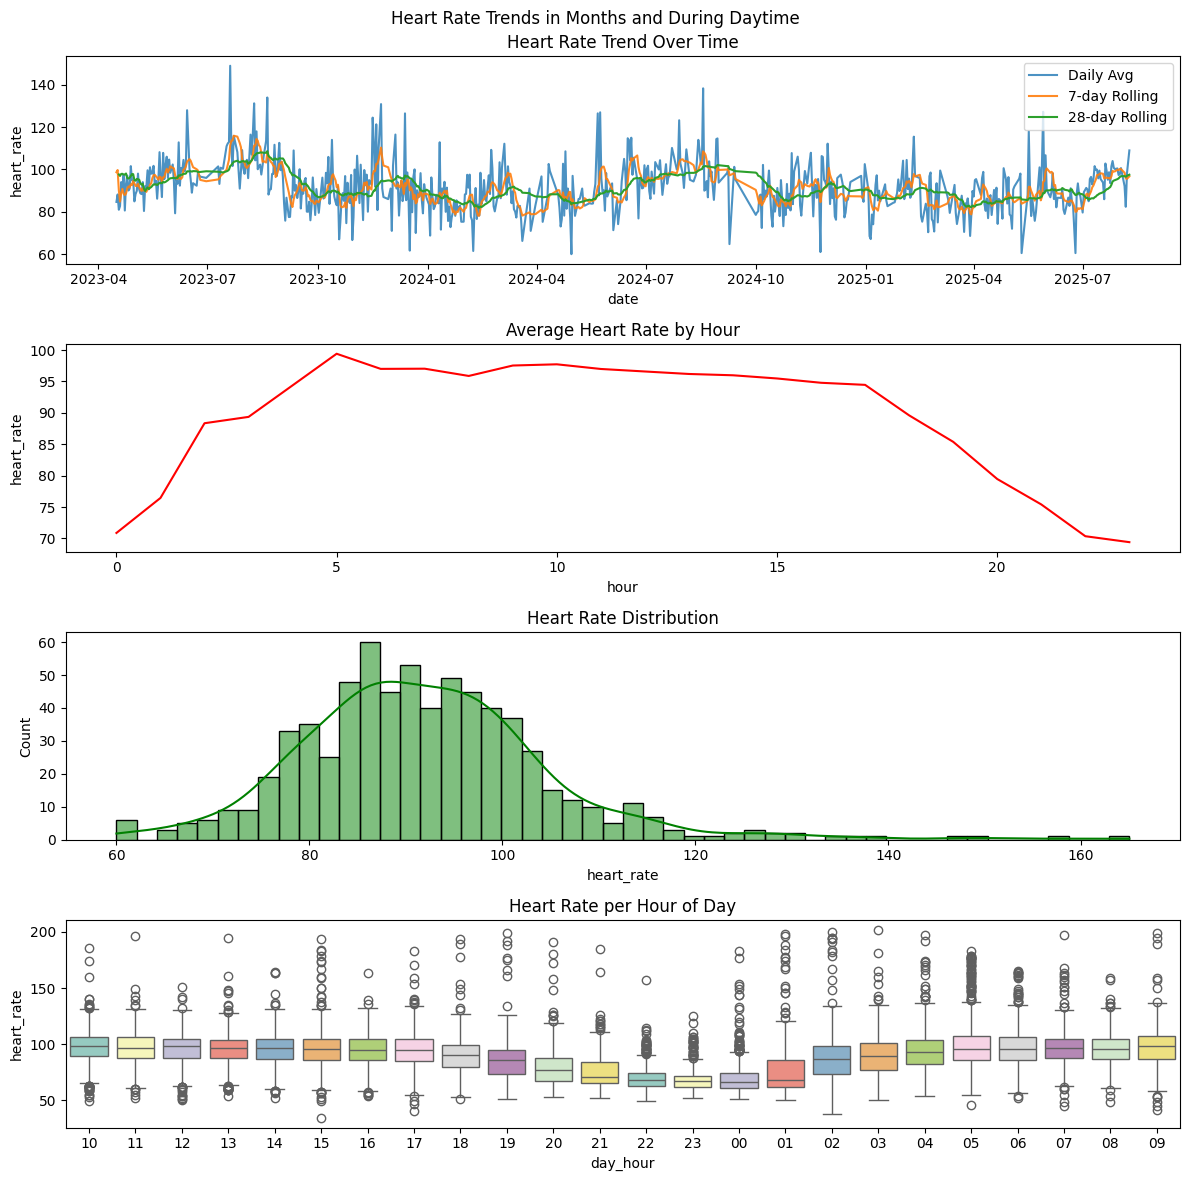

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# 2. Extract date & hour
df['date'] = df['update_time'].dt.date
df['hour'] = df['update_time'].dt.hour

# 3. Daily average HR
heart_year = df[['date', 'heart_rate']].groupby('date').mean().reset_index()

# 4. Rolling mean (7 hari & 28 hari)
heart_year['weekly_mean'] = heart_year['heart_rate'].rolling(window=7).mean()
heart_year['four_week_mean'] = heart_year['heart_rate'].rolling(window=28).mean()

# 5. Plot
plt.figure(figsize=(12,12))

# --- Plot 1: Trend ikut tarikh ---
ax1 = plt.subplot(411)
sns.lineplot(
    x="date", y="heart_rate",
    data=heart_year[heart_year['date'] > date(2023,4,1)],
    alpha=0.8, label='Daily Avg'
)
sns.lineplot(
    x="date", y="weekly_mean",
    data=heart_year[heart_year['date'] > date(2023,4,1)],
    alpha=0.9, label='7-day Rolling'
)
sns.lineplot(
    x="date", y="four_week_mean",
    data=heart_year[heart_year['date'] > date(2023,4,1)],
    alpha=1, label='28-day Rolling'
)
ax1.set_title("Heart Rate Trend Over Time")
ax1.legend()

# --- Plot 2: Average ikut jam ---
heart_day = df[['hour', 'heart_rate']].groupby('hour').mean().reset_index()
ax2 = plt.subplot(412)
sns.lineplot(x="hour", y="heart_rate", data=heart_day, alpha=1, color="red")
ax2.set_title("Average Heart Rate by Hour")

# --- Plot 3: Distribution HR ---
ax3 = plt.subplot(413)
sns.histplot(heart_year['heart_rate'], bins=50, color='g', kde=True)
ax3.set_title("Heart Rate Distribution")

# --- Plot 4: Boxplot ikut jam ---
df['day_hour'] = df['update_time'].dt.strftime('%H')
ax4 = plt.subplot(414)
sns.boxplot(
    x="day_hour", y="heart_rate",
    data=df[df['date'] > date(2023,4,1)], palette="Set3"
)
ax4.set_title("Heart Rate per Hour of Day")

plt.suptitle("Heart Rate Trends in Months and During Daytime")
plt.tight_layout()
plt.show()

When looking at the user’s heart rate, we can see that the average is around 75 bpm. There are times when the heart rate drops to about 60 bpm, which usually happens during rest or sleep. On the other hand, there are also spikes going above 100 bpm, most likely during physical activity or moments of stress.  

We also notice that the fluctuations are not random – the user tends to have higher heart rates in the afternoon compared to the early morning. This pattern suggests a mix of daily routine and activity levels influencing the numbers.  

Even though the overall trend looks stable, there are still a few irregular peaks that stand out. These could be linked to unexpected activities or short bursts of exertion. In short, the heart rate data tells us that the user maintains a fairly normal rhythm, but there are moments worth paying attention to.